# **Drug Discovery [Part 4] Regression Models with Random Forest**

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

## **2. Load the data set**

In [26]:
df = pd.read_csv('/content/coronavirus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Coronavirus*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [27]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [28]:
Y = df.pIC50
Y

0     5.142668
1     5.026872
2     4.869666
3     4.882397
4     5.698970
        ...   
81    4.675718
82    3.644548
83    4.412289
84    4.841638
85    4.675718
Name: pIC50, Length: 86, dtype: float64

### **3.3. Let's examine the data dimension**

In [29]:
X.shape

(86, 881)

In [30]:
Y.shape

(86,)

### **3.4. Remove low variance features**

In [31]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [32]:
X.shape

(86, 185)

## **4. Data split (80/20 ratio)**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
X_train.shape, Y_train.shape

((68, 185), (68,))

In [35]:
X_test.shape, Y_test.shape

((18, 185), (18,))

## **5. Building a Regression Model using Random Forest**

In [36]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
r2 = model.score(X_test, Y_test)
r2

0.6527951684880227

In [37]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

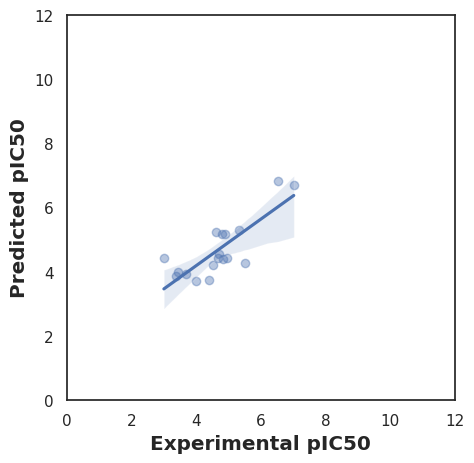

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

**KNN**

In [39]:
model =  KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
r2 = model.score(X_test, Y_test)
r2

0.6854428357094827

In [40]:
Y_pred_knn = model.predict(X_test)

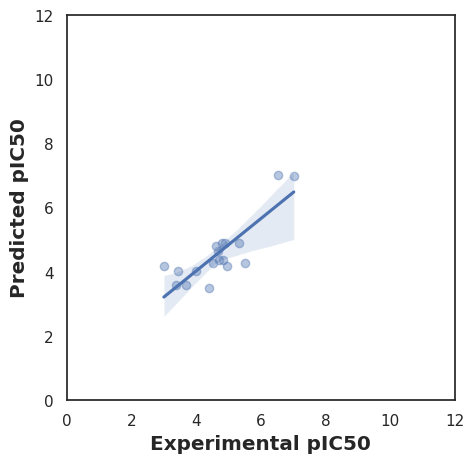

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred_knn, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
model =  GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
r2 = model.score(X_test, Y_test)
r2

0.6728817302474888

In [43]:
Y_pred_gradient = model.predict(X_test)

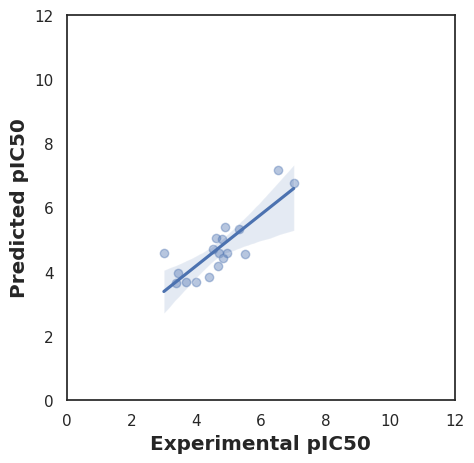

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred_gradient, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

KNN using GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
knn_regressor = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [2,3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.36
R^2 Score: 0.64


Stacking KNN,GBR

In [46]:
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

knn_regressor = KNeighborsRegressor(n_neighbors=2)
gbr_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Define the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('knn', knn_regressor),
        ('gbr', gbr_regressor)
    ],
    final_estimator=LinearRegression()
)

# Train the stacking regressor
stacking_regressor.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = stacking_regressor.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.28
R^2 Score: 0.71


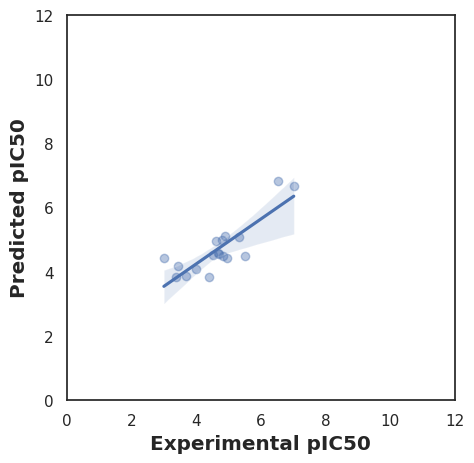

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()